In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso , Ridge
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import os
from sklearn.preprocessing import LabelEncoder

# EDA

In [2]:
# We read our processed Excel file
df = pd.read_csv('Work_data.csv')

In [3]:
# We make the neccessary transformations
df['date'] = pd.to_datetime(df['date'], format='%d_%m_%y')
df['Tree'] = df['Tree'].astype(int)
df['Number of manual annotations'] = df['Number of manual annotations'].astype(int)
df['AI detections'] = df['AI detections'].astype(int)
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Tree                          418 non-null    int32         
 1   Ground Truth                  418 non-null    int64         
 2   Number of manual annotations  418 non-null    int32         
 3   AI detections                 418 non-null    int32         
 4   variety                       418 non-null    object        
 5   GS                            418 non-null    int64         
 6   field                         418 non-null    object        
 7   date                          418 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(3), int64(2), object(2)
memory usage: 21.4+ KB
None


,Tree,Ground Truth,Number of manual annotations,AI detections,GS
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,16.011962,22.287081,17.224880,14.576555,57.626794
std,10.341987,11.074584,10.030512,10.805680,28.724349
min,1.000000,2.000000,1.000000,0.000000,7.000000
25%,7.000000,15.000000,10.000000,8.000000,53.000000
50%,15.000000,20.000000,15.000000,13.000000,71.000000
75%,23.000000,28.000000,22.000000,18.000000,83.000000
max,45.000000,66.000000,68.000000,71.000000,84.000000


In [4]:
# Print some essential information
print(df['variety'].unique())
print(df['GS'].unique())
print(df['field'].unique())

['Dunkelfelder' 'Moschofilero' 'Sauvignon_Blanc' 'Cabernet_Sauvignon'
 'Pinot_Noir' 'Merlot' 'Portugieser']
[83 84 53  7 60 71 75 55]
['Obrigheim' 'Grape_3' 'Grape_1' 'Asselheim' 'Melipilla' 'Grape_2'
 'AsselheimNorth' 'Mayer' 'Gruenstadt']


In [5]:
# Check for null values
df.isnull().sum()

Tree                            0
Ground Truth                    0
Number of manual annotations    0
AI detections                   0
variety                         0
GS                              0
field                           0
date                            0
dtype: int64

## Heatmap

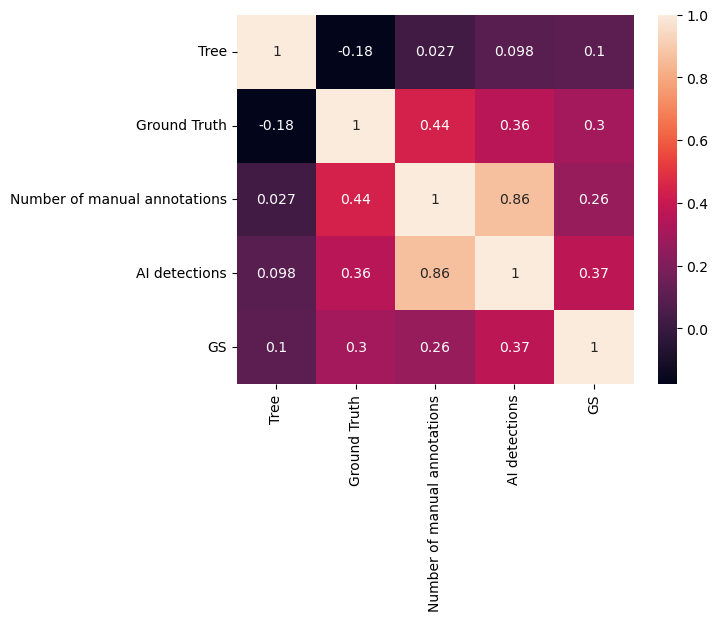

In [6]:
sns.heatmap(df.corr(),annot=True);

## Pairplot

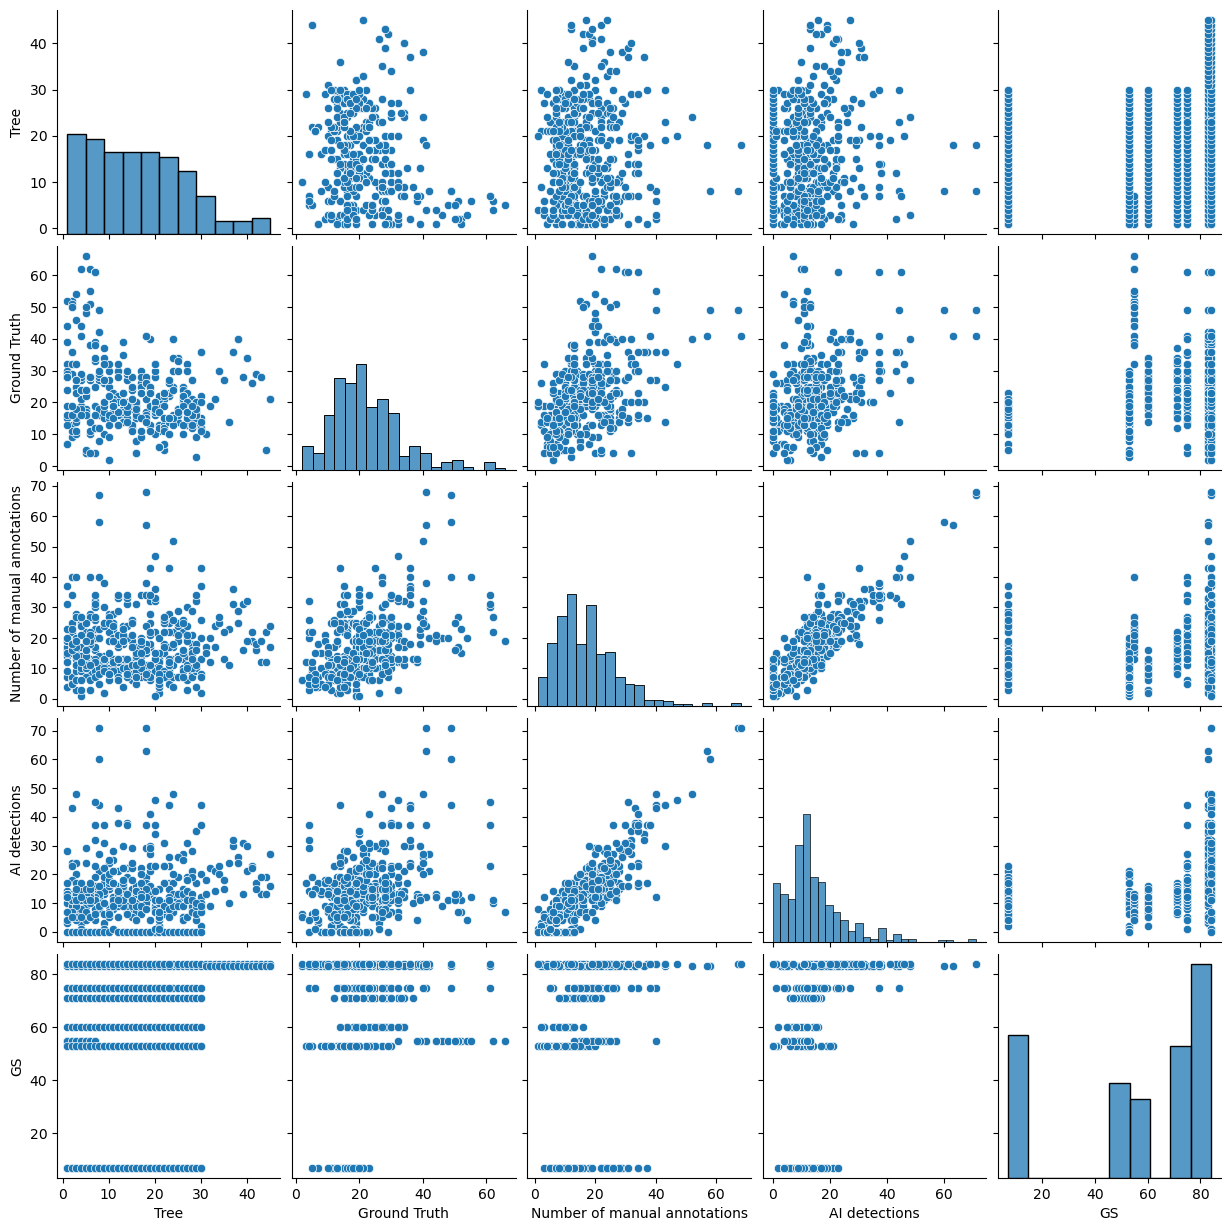

In [7]:
sns.pairplot(df);

# Variety: Dunkelfelder

In [8]:
df[(df['variety'] == 'Dunkelfelder')].sum()

Tree                                                                          238
Ground Truth                                                                  593
Number of manual annotations                                                  437
AI detections                                                                 490
variety                         DunkelfelderDunkelfelderDunkelfelderDunkelfeld...
GS                                                                           2422
field                           ObrigheimObrigheimObrigheimObrigheimObrigheimO...
dtype: object

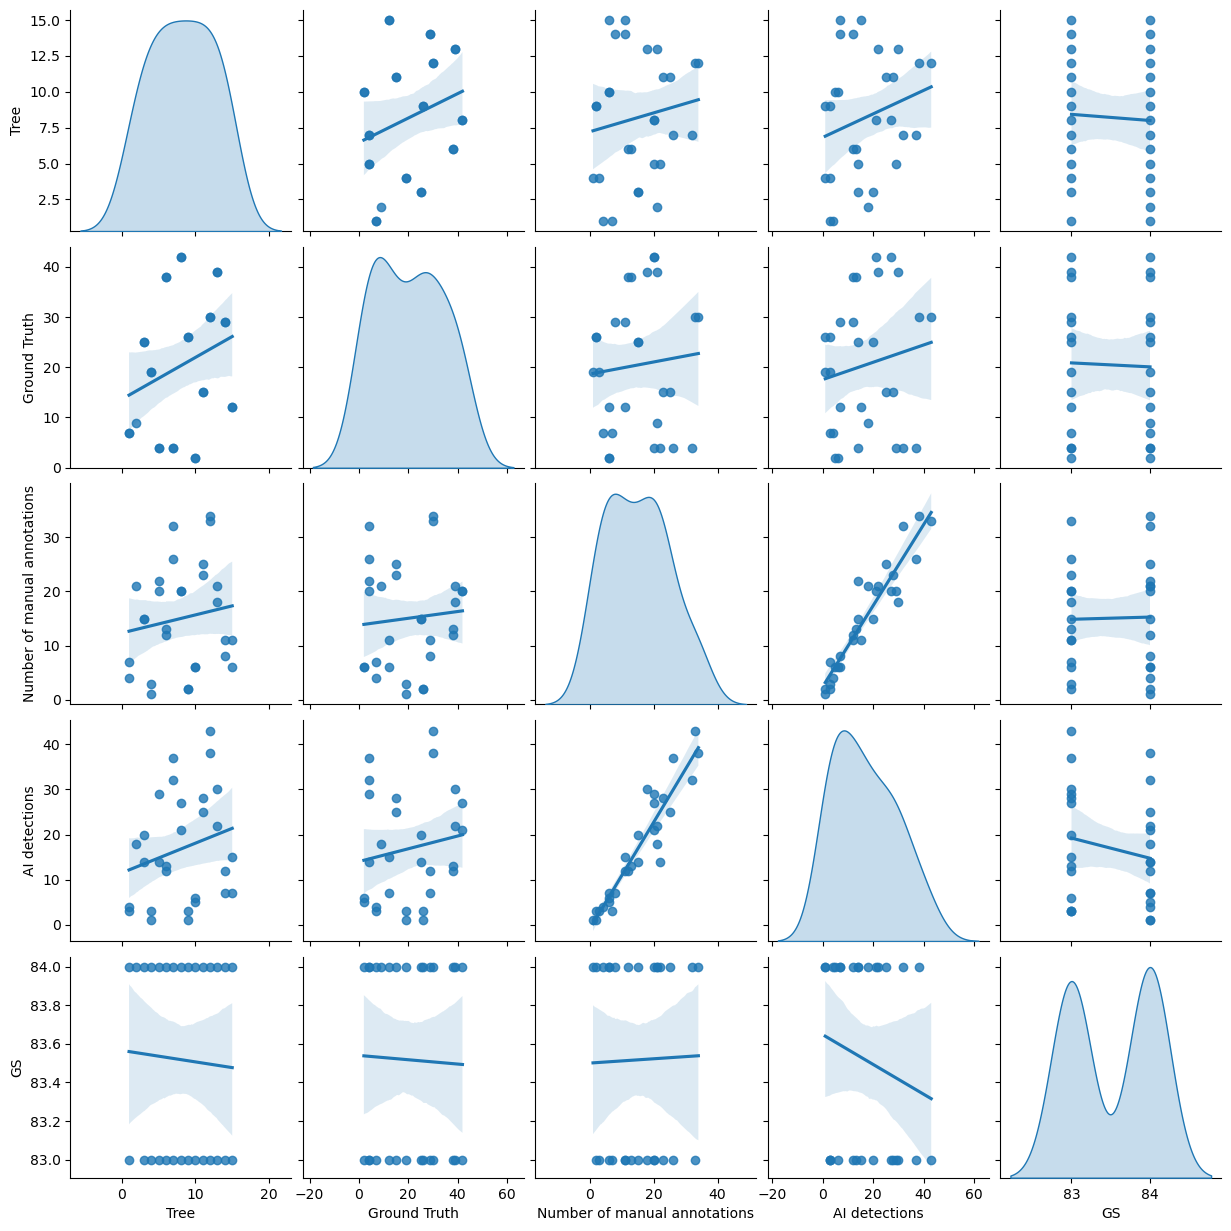

In [9]:
sns.pairplot(df[df['variety'] == 'Dunkelfelder'], kind= "reg" ,diag_kind ='kde' );

# Variety: Moschofilero

In [10]:
df[(df['variety'] == 'Moschofilero')].sum()

Tree                                                                          930
Ground Truth                                                                  992
Number of manual annotations                                                 1147
AI detections                                                                 848
variety                         MoschofileroMoschofileroMoschofileroMoschofile...
GS                                                                           1800
field                           Grape_3Grape_3Grape_3Grape_3Grape_3Grape_3Grap...
dtype: object

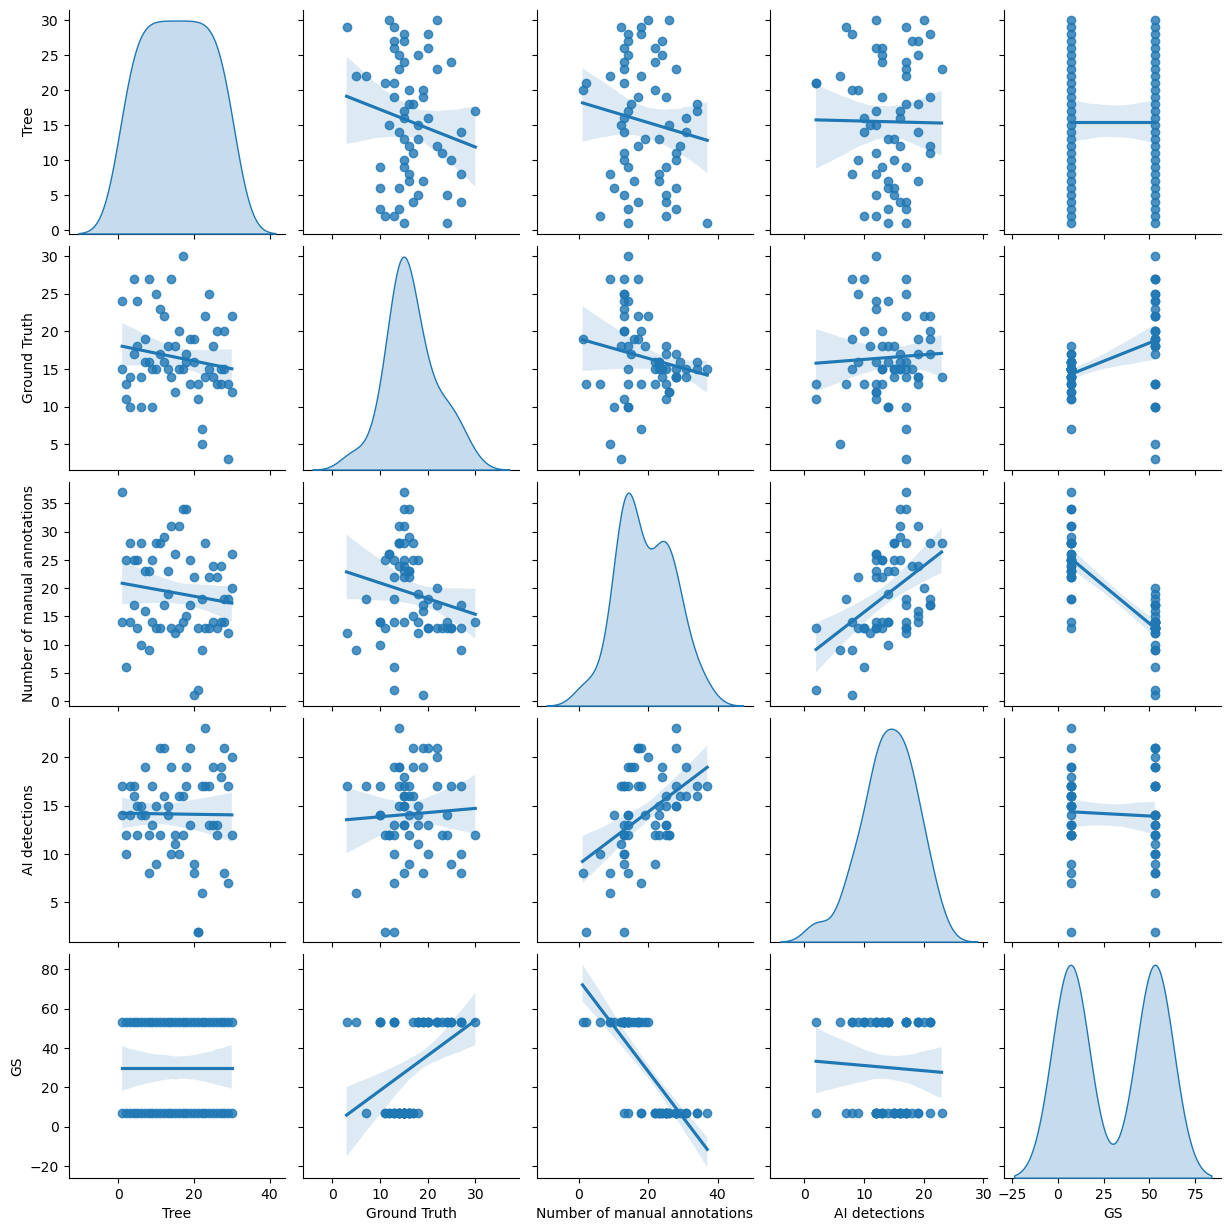

In [11]:
sns.pairplot(df[df['variety'] == 'Moschofilero'], kind= "reg" ,diag_kind ='kde' );

# Variety: Sauvignon_Blanc

In [12]:
df[df['variety'] == 'Sauvignon_Blanc'].sum()

Tree                                                                         1860
Ground Truth                                                                 2710
Number of manual annotations                                                 1591
AI detections                                                                1268
variety                         Sauvignon_BlancSauvignon_BlancSauvignon_BlancS...
GS                                                                           6390
field                           Grape_1Grape_1Grape_1Grape_1Grape_1Grape_1Grap...
dtype: object

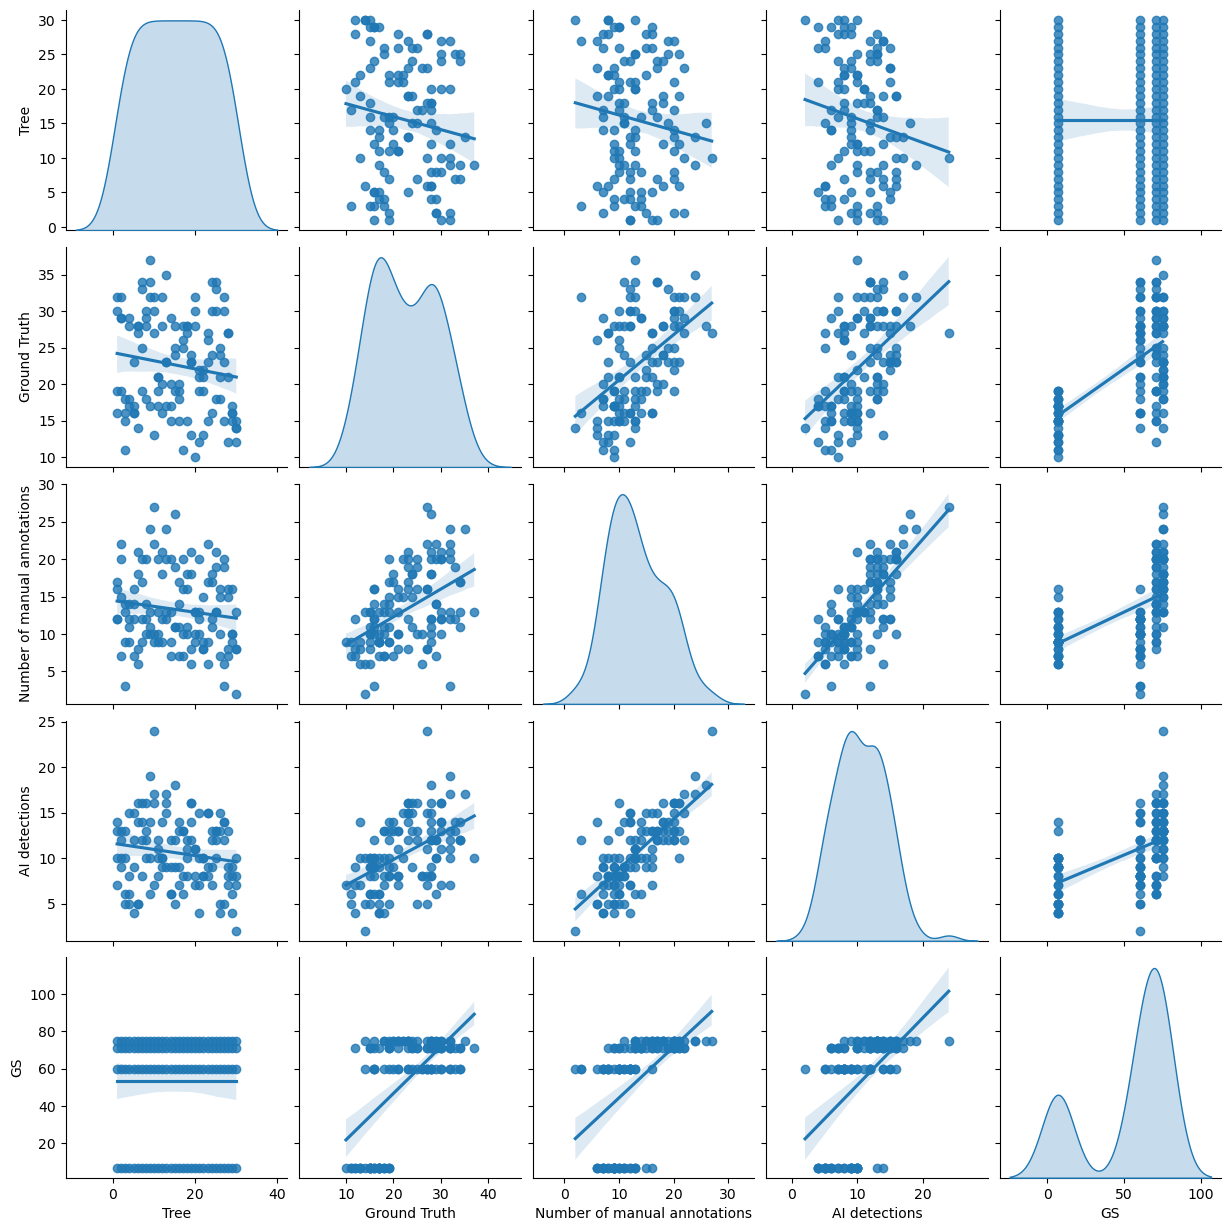

In [13]:
sns.pairplot(df[df['variety'] == 'Sauvignon_Blanc'], kind= "reg" ,diag_kind ='kde' );

# Variety: Cabernet_Sauvignon

In [14]:
df[df['variety'] == 'Cabernet_Sauvignon'].sum()

Tree                                                                          690
Ground Truth                                                                  584
Number of manual annotations                                                  754
AI detections                                                                 733
variety                         Cabernet_SauvignonCabernet_SauvignonCabernet_S...
GS                                                                           2505
field                           AsselheimAsselheimAsselheimAsselheimAsselheimA...
dtype: object

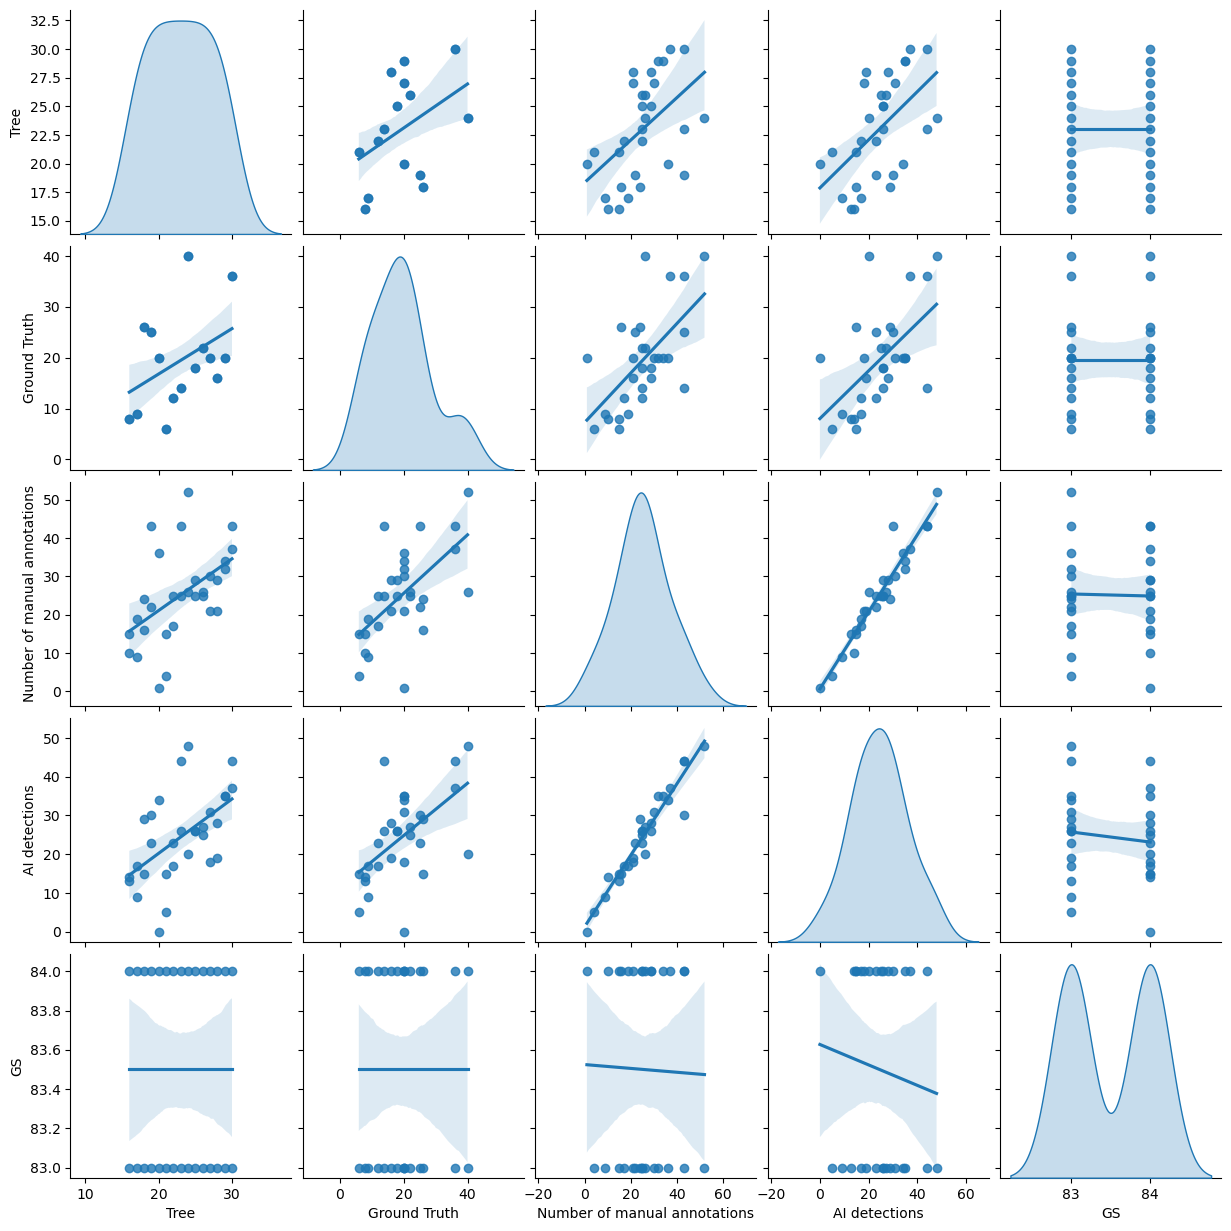

In [15]:
sns.pairplot(df[df['variety'] == 'Cabernet_Sauvignon'], kind= "reg" ,diag_kind ='kde' );

# Variety: Pinot

In [16]:
df[df['variety'] == 'Pinot'].sum()

Tree                            0.0
Ground Truth                    0.0
Number of manual annotations    0.0
AI detections                   0.0
variety                         0.0
GS                              0.0
field                           0.0
dtype: float64

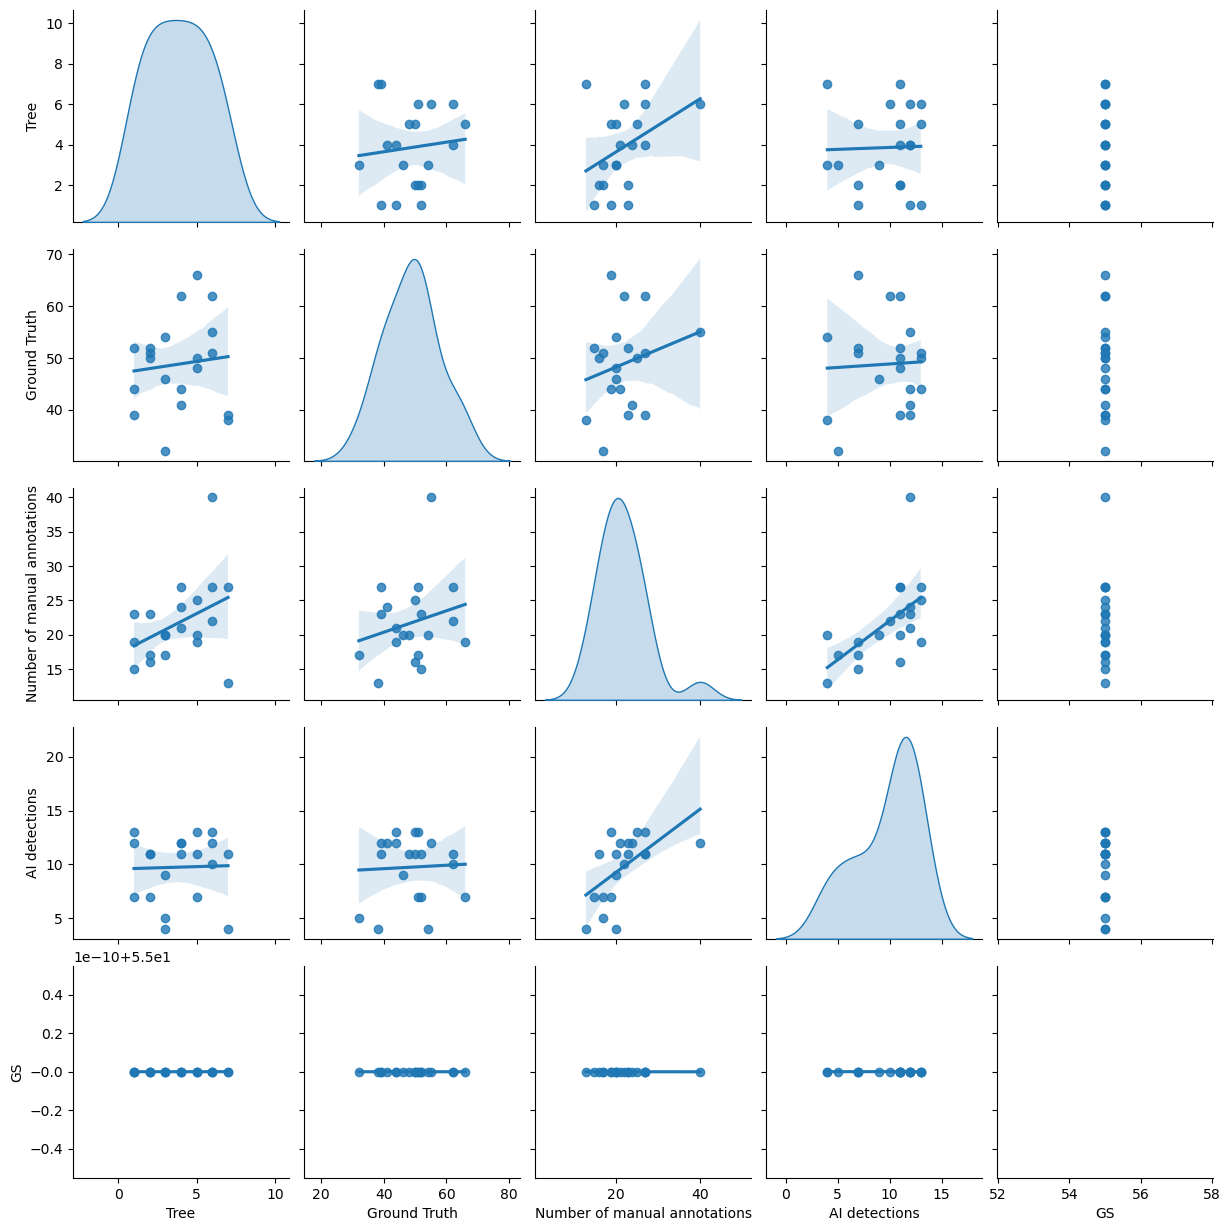

In [17]:
sns.pairplot(df[df['variety'] == 'Pinot_Noir'], kind= "reg" ,diag_kind ='kde' );

# Variety: Merlot

In [18]:
df[df['variety'] == 'Merlot'].sum()

Tree                                                                         2070
Ground Truth                                                                 1656
Number of manual annotations                                                 1149
AI detections                                                                 895
variety                         MerlotMerlotMerlotMerlotMerlotMerlotMerlotMerl...
GS                                                                           4305
field                           Grape_2Grape_2Grape_2Grape_2Grape_2Grape_2Grap...
dtype: object

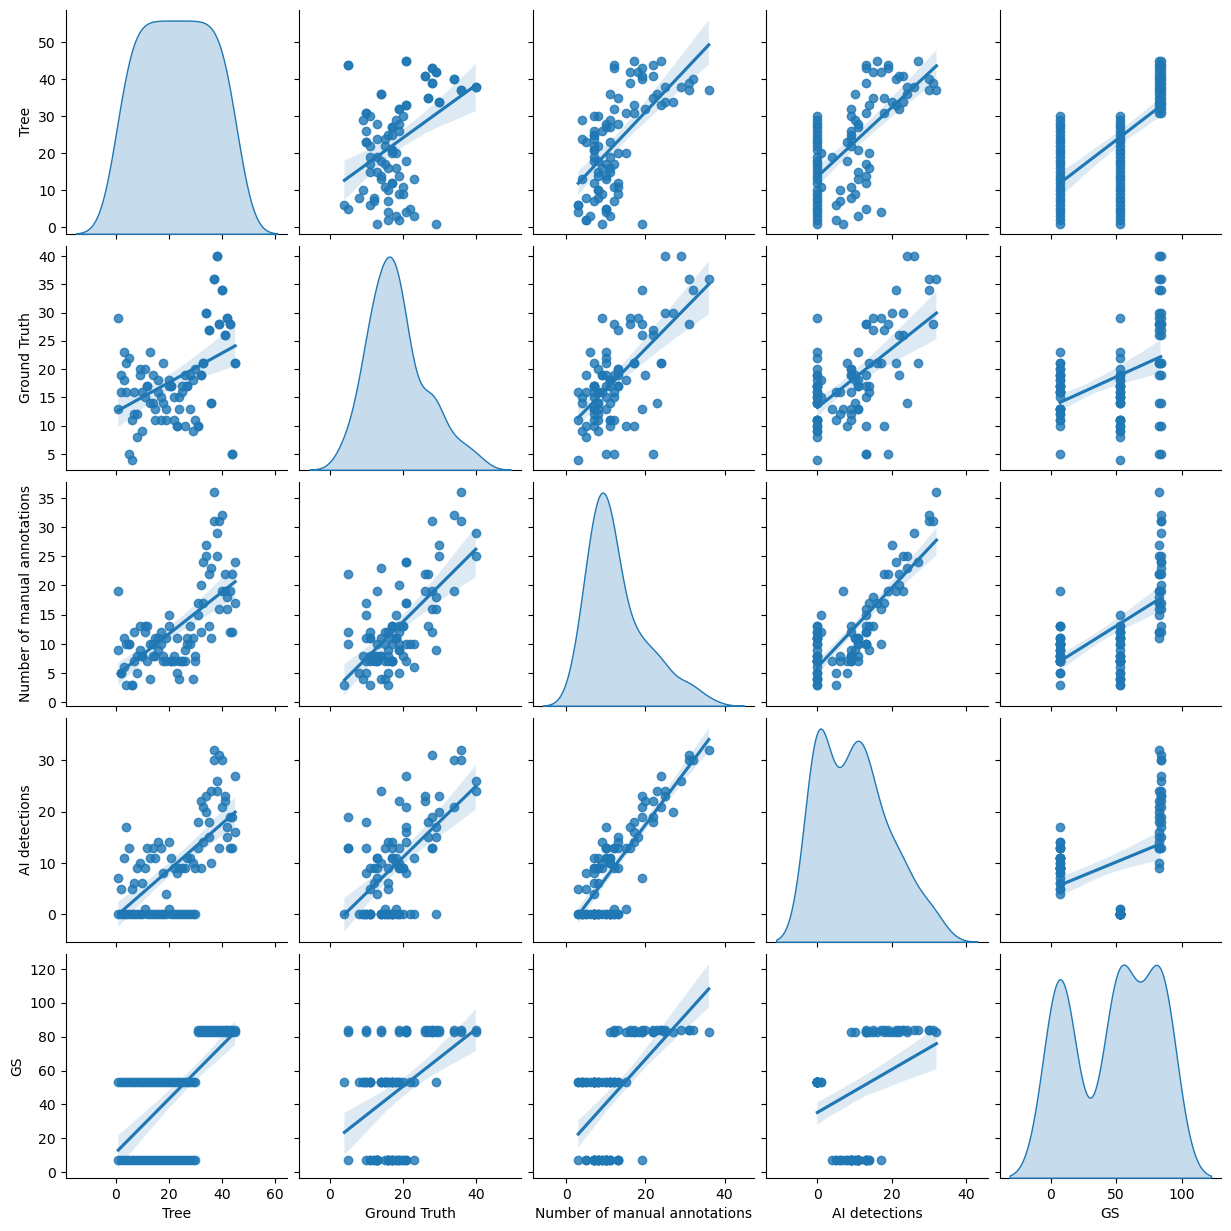

In [19]:
sns.pairplot(df[df['variety'] == 'Merlot'], kind= "reg" ,diag_kind ='kde' );

# Variety: Portugieser

In [20]:
df[df['variety'] == 'Portugieser'].sum()

Tree                                                                          828
Ground Truth                                                                 1805
Number of manual annotations                                                 1687
AI detections                                                                1664
variety                         PortugieserPortugieserPortugieserPortugieserPo...
GS                                                                           5566
field                           MayerMayerMayerMayerMayerMayerMayerMayerMayerM...
dtype: object

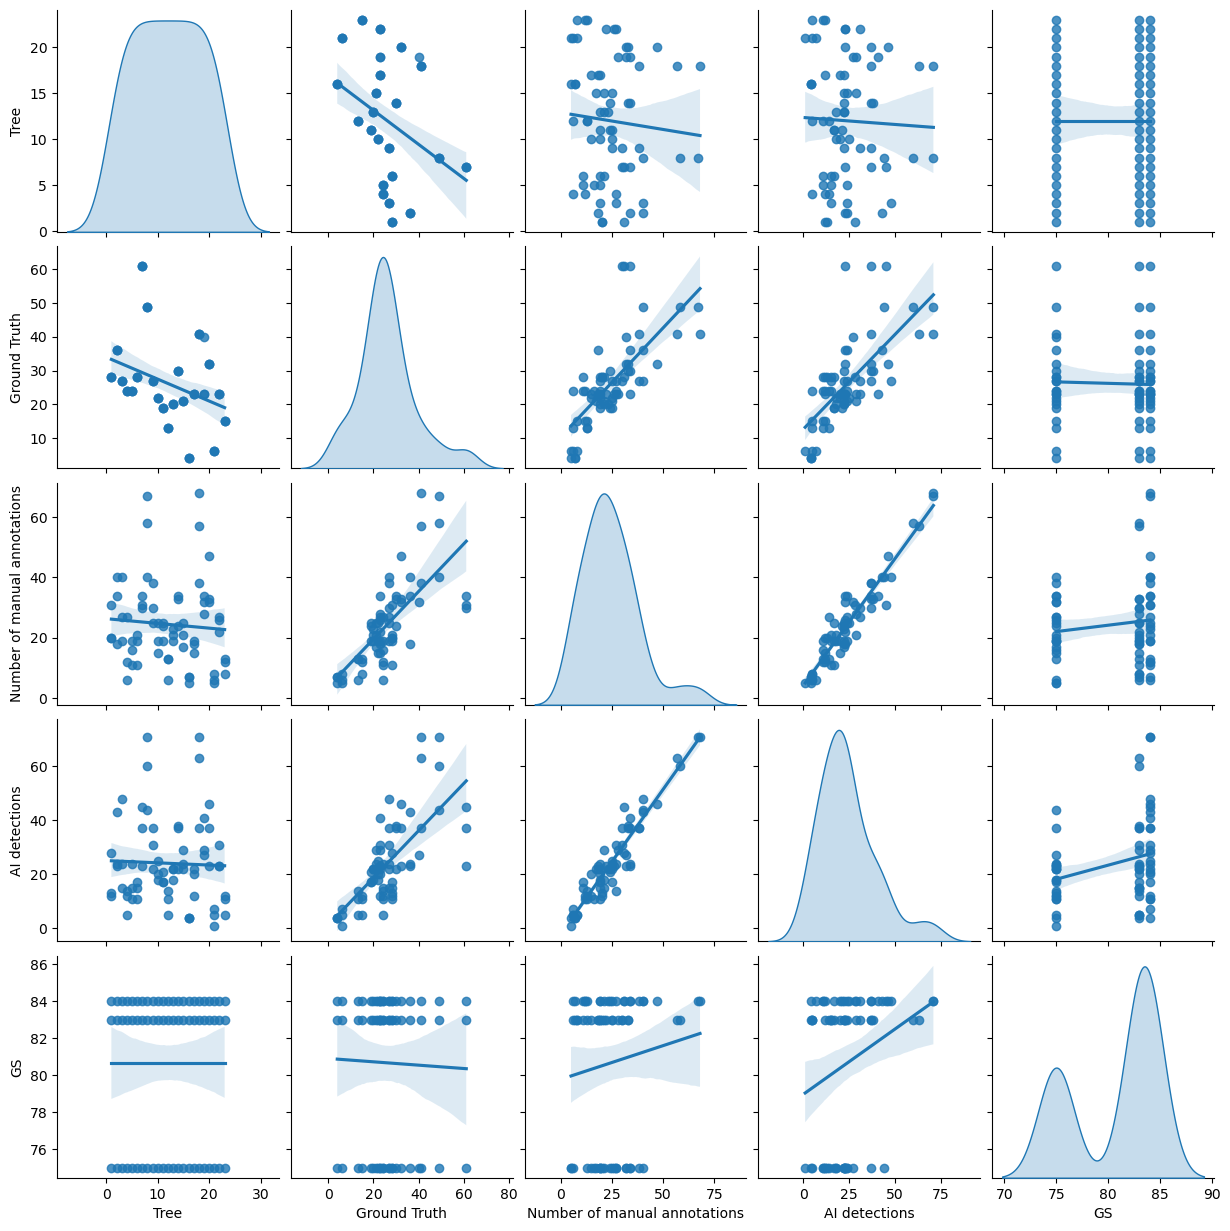

In [21]:
sns.pairplot(df[df['variety'] == 'Portugieser'], kind= "reg" ,diag_kind ='kde' );

# Difference between Manual Annotations & AI Detections

In [22]:
dif_1 = df['Number of manual annotations']-df['AI detections']
dif_1 = pd.DataFrame(dif_1)

In [23]:
df['MA_vs_AI'] = dif_1
dif_col_1 = df.pop('MA_vs_AI')
df.insert(4, 'MA_vs_AI', dif_col_1)
df

,Tree,Ground Truth,Number of manual annotations,AI detections,MA_vs_AI,variety,GS,field,date
0,1,7,7,3,4,Dunkelfelder,83,Obrigheim,2023-08-09
1,3,25,15,20,-5,Dunkelfelder,83,Obrigheim,2023-08-09
2,4,19,3,3,0,Dunkelfelder,83,Obrigheim,2023-08-09
3,5,4,20,29,-9,Dunkelfelder,83,Obrigheim,2023-08-09
4,6,38,13,13,0,Dunkelfelder,83,Obrigheim,2023-08-09
...,...,...,...,...,...,...,...,...,...
413,19,23,34,41,-7,Portugieser,84,Gruenstadt,2023-08-30
414,20,32,47,46,1,Portugieser,84,Gruenstadt,2023-08-30
415,21,6,6,7,-1,Portugieser,84,Gruenstadt,2023-08-30
416,22,23,27,31,-4,Portugieser,84,Gruenstadt,2023-08-30


# Difference between Ground Truth & AI Detections

In [24]:
dif_2 = df['Ground Truth']-df['AI detections']
dif_2 = pd.DataFrame(dif_2)

In [25]:
df['GT_vs_AI'] = dif_2
dif_col_2 = df.pop('GT_vs_AI')
df.insert(4, 'GT_vs_AI', dif_col_2)
df

,Tree,Ground Truth,Number of manual annotations,AI detections,GT_vs_AI,MA_vs_AI,variety,GS,field,date
0,1,7,7,3,4,4,Dunkelfelder,83,Obrigheim,2023-08-09
1,3,25,15,20,5,-5,Dunkelfelder,83,Obrigheim,2023-08-09
2,4,19,3,3,16,0,Dunkelfelder,83,Obrigheim,2023-08-09
3,5,4,20,29,-25,-9,Dunkelfelder,83,Obrigheim,2023-08-09
4,6,38,13,13,25,0,Dunkelfelder,83,Obrigheim,2023-08-09
...,...,...,...,...,...,...,...,...,...,...
413,19,23,34,41,-18,-7,Portugieser,84,Gruenstadt,2023-08-30
414,20,32,47,46,-14,1,Portugieser,84,Gruenstadt,2023-08-30
415,21,6,6,7,-1,-1,Portugieser,84,Gruenstadt,2023-08-30
416,22,23,27,31,-8,-4,Portugieser,84,Gruenstadt,2023-08-30


In [26]:
df['GT_vs_AI'] = df['GT_vs_AI'].astype(int)
df['MA_vs_AI'] = df['MA_vs_AI'].astype(int)

# Boxplots for every session

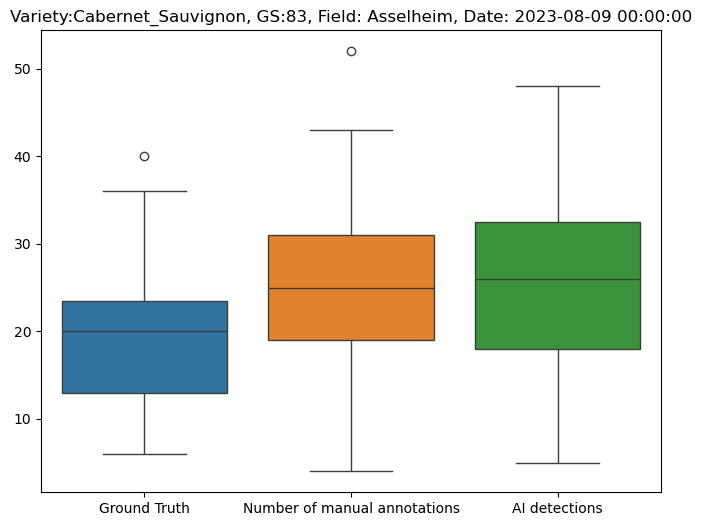

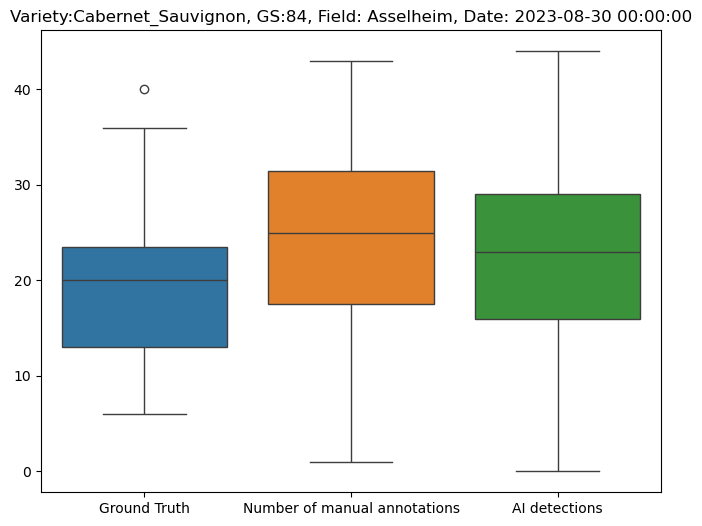

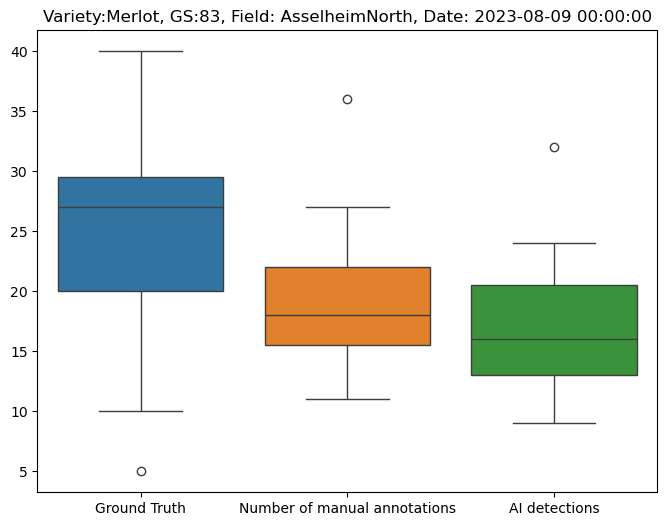

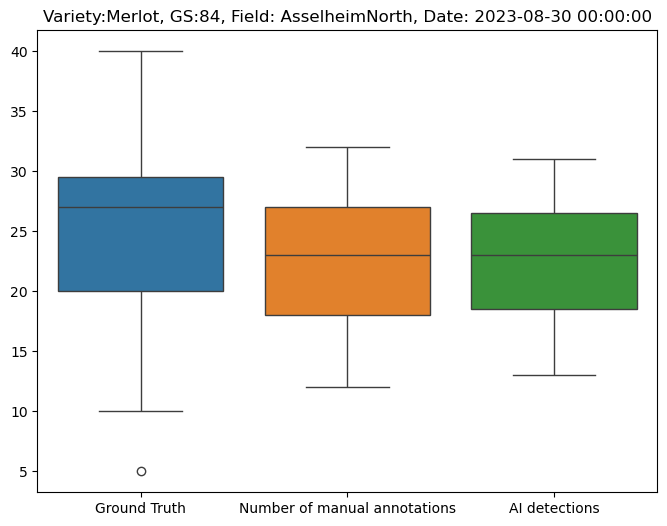

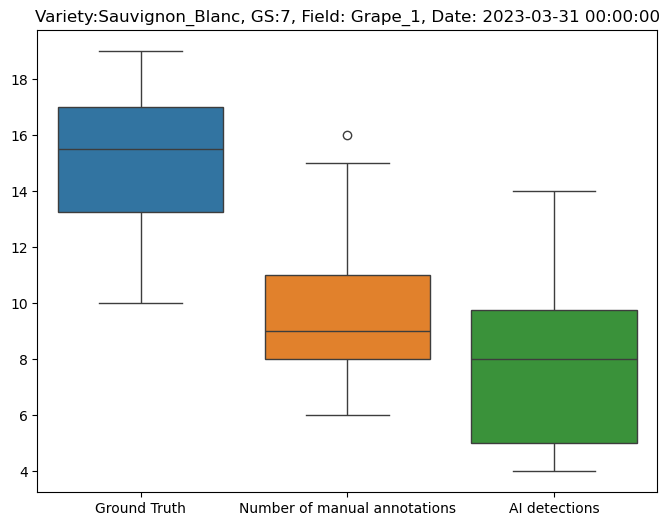

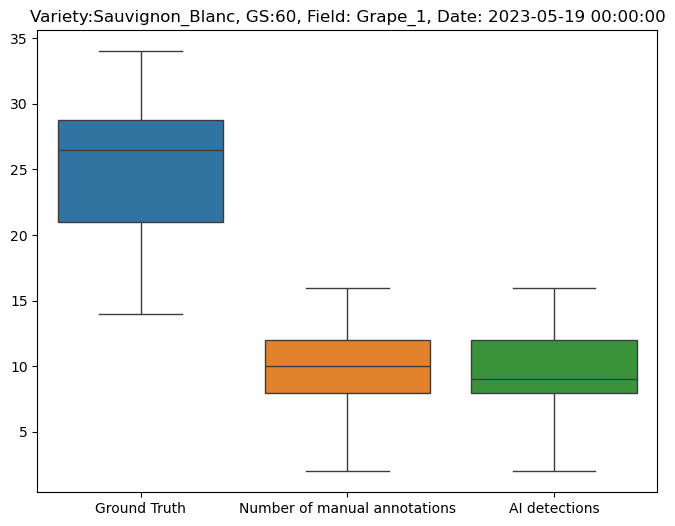

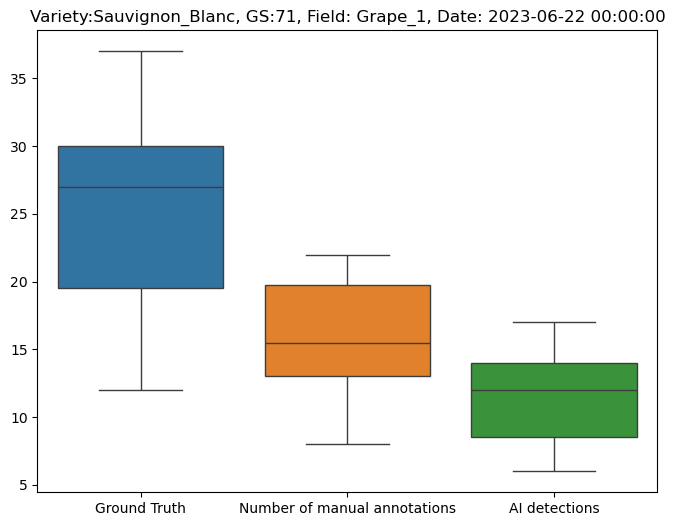

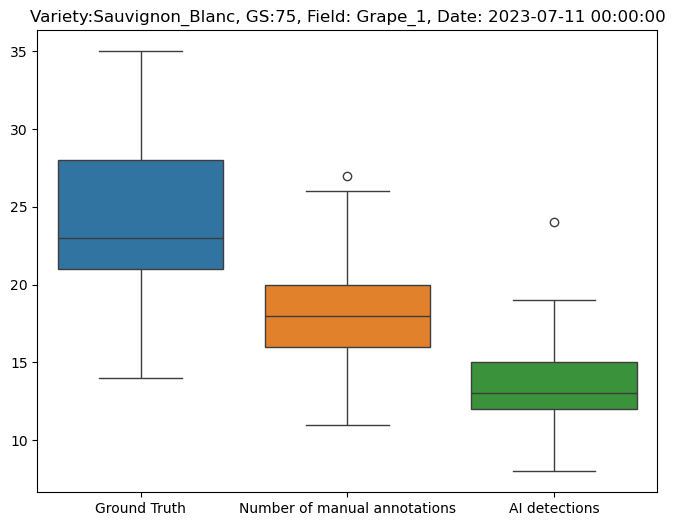

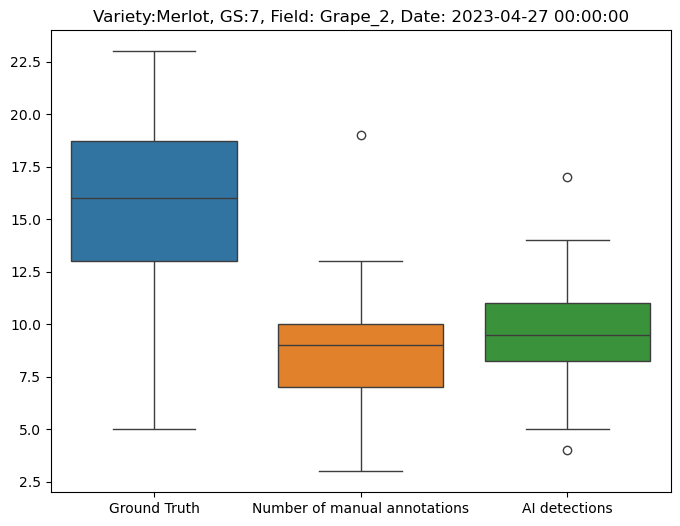

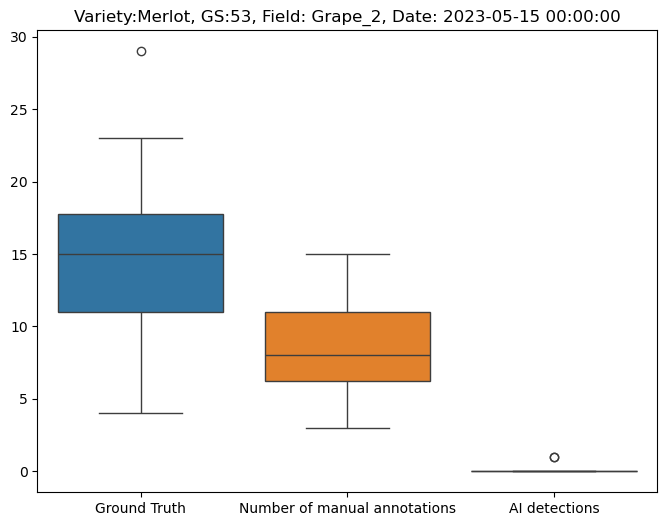

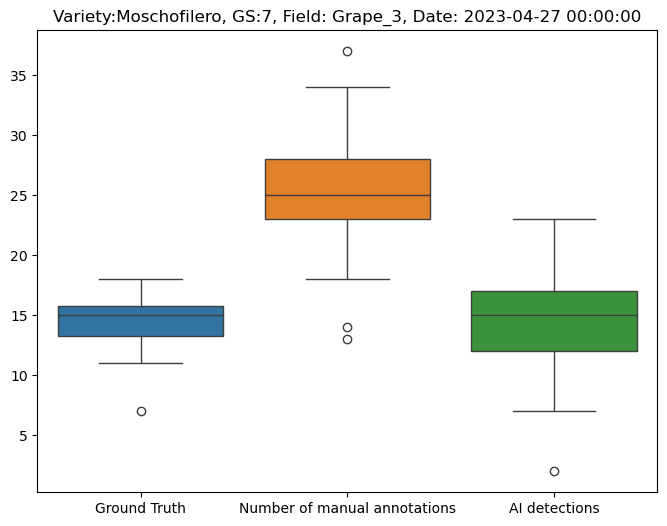

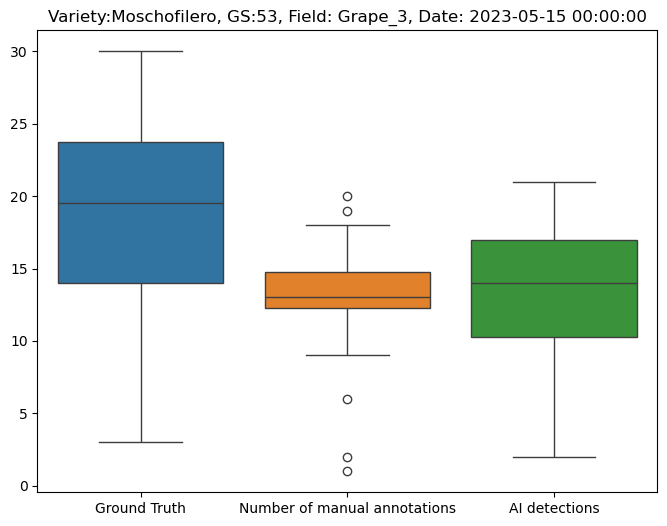

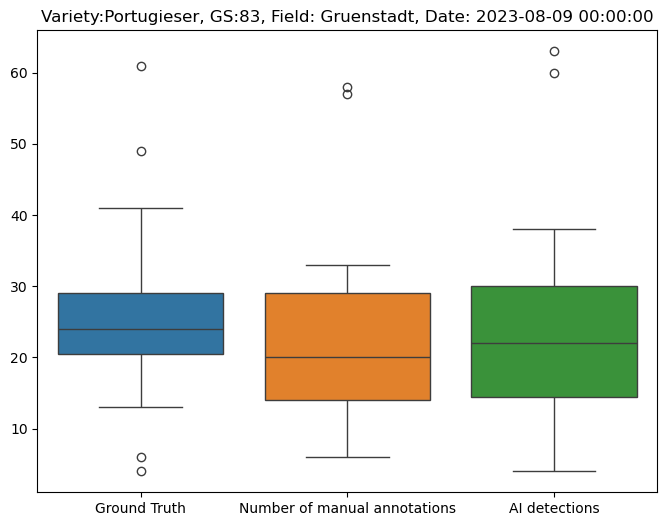

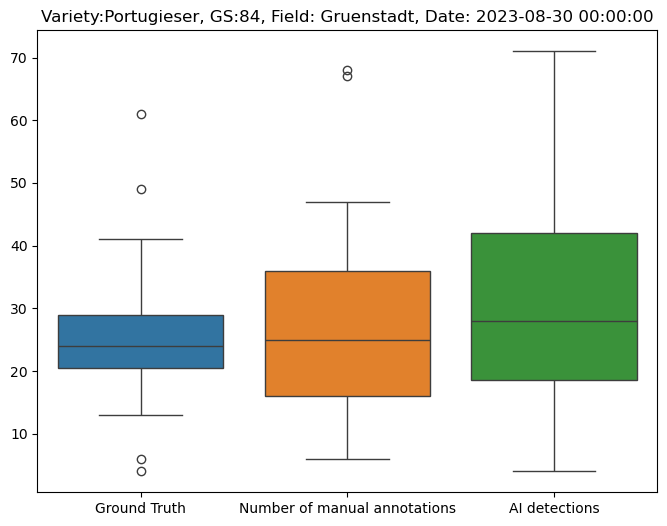

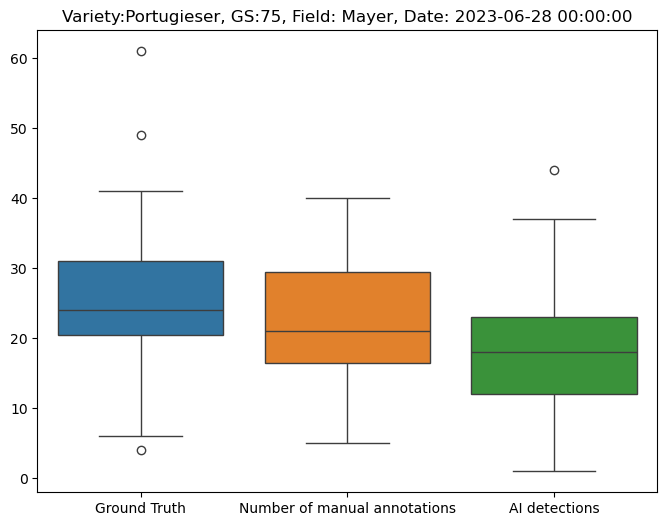

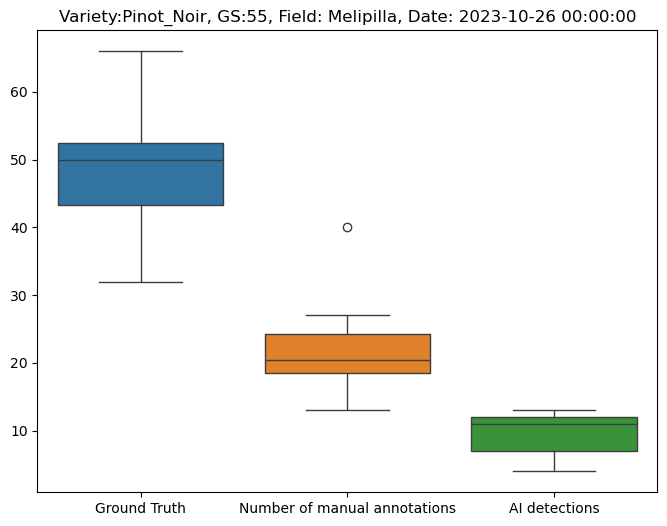

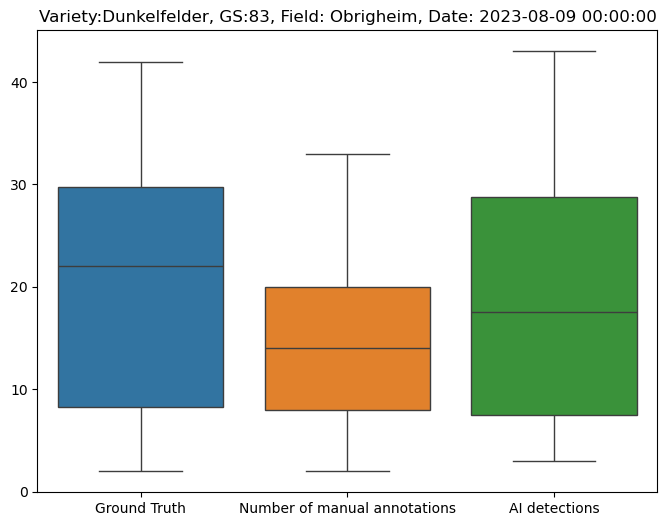

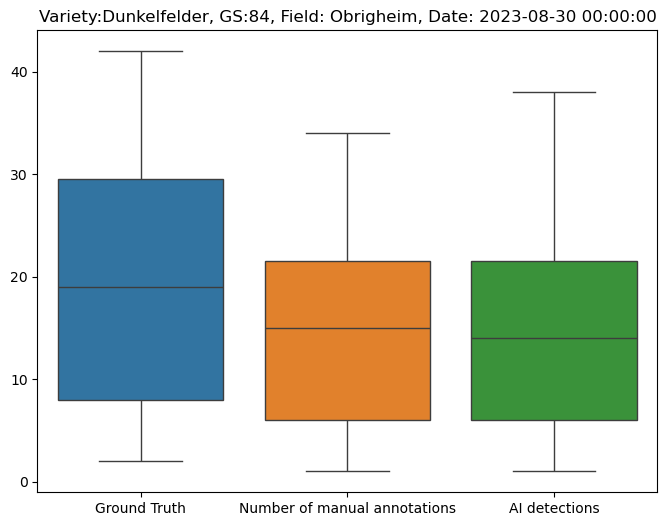

In [27]:
numeric_columns = ['Ground Truth', 'Number of manual annotations', 'AI detections']

for (field, date, variety, GS), group_df in df.groupby(['field', 'date', 'variety', "GS"]):
    subset_df = group_df[numeric_columns]
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=subset_df, orient='vertical')
    plt.title(f'Variety:{variety}, GS:{GS}, Field: {field}, Date: {date}')
    plt.show()

In [28]:
# Save the boxplots

# List of numeric columns you want to include in the boxplot
numeric_columns = ['Ground Truth', 'Number of manual annotations', 'AI detections']

# Specify the directory where you want to save the plots
output_directory = r'C:\Users\Stavros\Desktop\Eden Library'

# Loop through unique combinations of 'field' and 'date'
for (field, date, variety, GS), group_df in df.groupby(['field', 'date','variety', "GS"]):
    # Select the subset of the DataFrame for the current 'field' and 'date'
    subset_df = group_df[numeric_columns]
    
    # Create a boxplot for the current combination
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.boxplot(data=subset_df, orient='vertical')
    plt.title(f'Variety:{variety}, GS:{GS}, Field: {field}, Date: {date}')
    
     # Format the date to remove characters that are not allowed in filenames
    formatted_date = str(date).replace(' ', '_').replace(':', '-')
    
    # Save the plot as an image file
    output_filename = f'{field}_{formatted_date}_boxplot.png'
    output_path = os.path.join(output_directory, output_filename)
    plt.savefig(output_path)
    
    # Close the plot to free up memory
    plt.close()

print("Boxplots saved successfully.")

Boxplots saved successfully.


# Label Enconding & Creating a new dataframe for model training

In [29]:
lb=LabelEncoder()
df['variety']=lb.fit_transform(df['variety'])
print(lb.classes_)
df['field']=lb.fit_transform(df['field'])
print(lb.classes_)
df.to_csv('model_data.csv',  encoding='utf-8')

['Cabernet_Sauvignon' 'Dunkelfelder' 'Merlot' 'Moschofilero' 'Pinot_Noir'
 'Portugieser' 'Sauvignon_Blanc']
['Asselheim' 'AsselheimNorth' 'Grape_1' 'Grape_2' 'Grape_3' 'Gruenstadt'
 'Mayer' 'Melipilla' 'Obrigheim']


In [30]:
model_data = pd.read_csv('model_data.csv')

In [31]:
print(model_data.sum())
model_data

Unnamed: 0                                                                  87153
Tree                                                                         6693
Ground Truth                                                                 9316
Number of manual annotations                                                 7200
AI detections                                                                6093
GT_vs_AI                                                                     3223
MA_vs_AI                                                                     1107
variety                                                                      1534
GS                                                                          24088
field                                                                        1430
date                            2023-08-092023-08-092023-08-092023-08-092023-0...
dtype: object


,Unnamed: 0,Tree,Ground Truth,Number of manual annotations,AI detections,GT_vs_AI,MA_vs_AI,variety,GS,field,date
0,0,1,7,7,3,4,4,1,83,8,2023-08-09
1,1,3,25,15,20,5,-5,1,83,8,2023-08-09
2,2,4,19,3,3,16,0,1,83,8,2023-08-09
3,3,5,4,20,29,-25,-9,1,83,8,2023-08-09
4,4,6,38,13,13,25,0,1,83,8,2023-08-09
...,...,...,...,...,...,...,...,...,...,...,...
413,413,19,23,34,41,-18,-7,5,84,5,2023-08-30
414,414,20,32,47,46,-14,1,5,84,5,2023-08-30
415,415,21,6,6,7,-1,-1,5,84,5,2023-08-30
416,416,22,23,27,31,-8,-4,5,84,5,2023-08-30
